# The Augmented Dickey-Fuller test for mean reversion

The Augmented Dickey Fuller test is a statistical test carried out to check for mean reversion in financial instruments.
It builds the foundation for some investment strategies. For instance, if a stock displays mean reversion; at exrtreme price levels a counter order can be placed with the assurance that the price will reverse towards the rolling mean (average).
Below I have implemented the test on Amazon stocks and EURUSD (currency pair)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from datetime import datetime
%matplotlib inline

In [5]:
# Loading the amazon data and storing it in the variable amzn

amzn = pd.read_csv("AMZN_CLOSE.csv")

In [6]:
# Importing the library for parsing currency pairs 

from forex_python.converter import CurrencyRates
c = CurrencyRates()

In [40]:
# Setting the parameters for loading the json file of EURUSD
currency = "EURUSD"
api_key = "ALgjXCpgWIzALIPH-8OI"
start_date = "2019-10-01"
end_date= "2020-05-15"
format = "records"
fields = "ohlc"

In [41]:
# Loading the EURUSD data
eur_usd = pd.read_json("https://tm-marketdata.com/api/v1/pandasDF?currency="+currency+"&api_key="+api_key+"&start_date="+start_date+"&end_date="+end_date+"&format="+format+"&fields="+fields)

In [43]:
# Setting the date column as index since we essentially want time-series data
eur_usd.set_index('date',inplace=True)

In [44]:
eur_usd.head()

,close,high,low,open
date,,,,
2019-10-01,1.09331,1.09437,1.08790,1.08991
2019-10-02,1.09591,1.09638,1.09039,1.09331
2019-10-03,1.09655,1.09996,1.09410,1.09600
2019-10-04,1.09787,1.10015,1.09571,1.09650
2019-10-07,1.09708,1.10008,1.09619,1.09830


In [33]:
#amzn.set_index("Date",inplace=True) # 

In [45]:
amzn.head()

,Adj. Close
Date,
2012-01-03,179.03
2012-01-04,177.51
2012-01-05,177.61
2012-01-06,182.61
2012-01-09,178.56


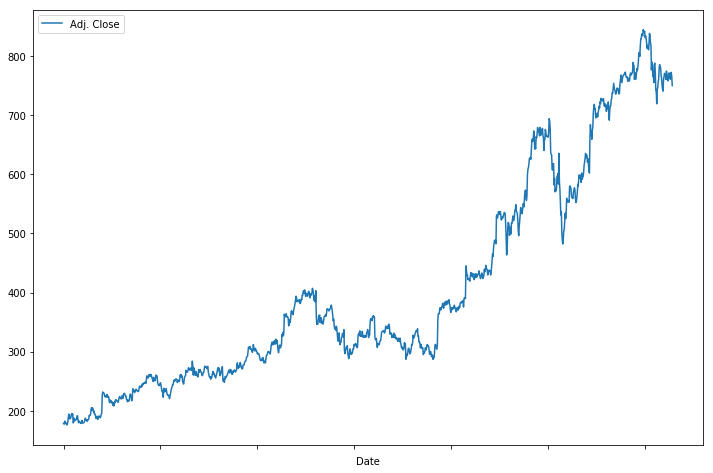

In [49]:
amzn.plot(figsize=(12,8)) # Visualizing the Amazon stock (Adjusted close price) data using matplotlib

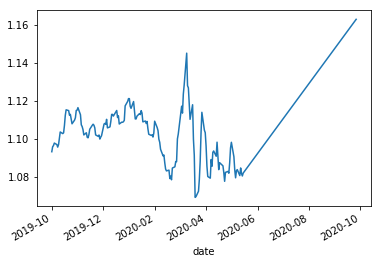

In [47]:
eur_usd['close'].plot(); # Visualizing the EURUSD close price data 

In [52]:
# Implementing the ADF mean reversion test with a lag order of 1
ts.adfuller(amzn['Adj. Close'],1)

(-0.1589471230489844,
 0.9432413665349045,
 0,
 1257,
 {'1%': -3.4355629707955395,
  '5%': -2.863842063387667,
  '10%': -2.567995644141416},
 8840.495805479291)

In [53]:
ts.adfuller(eur_usd['close'],1)

(-2.97081642222466,
 0.03771112633236811,
 1,
 163,
 {'1%': -3.471118535474365,
  '5%': -2.8794405060097024,
  '10%': -2.576313761526591},
 -1110.3154940456154)

# Analysis of results


For the Amazon test: 

(-0.1589471230489844,- This term represents the calculated test-statistic
 0.9432413665349045, - This term represents the p-value
 0,
 1257, - This represents the number of data points considered
 {'1%': -3.4355629707955395,  The represents the critical test-statistic statistic value for 1%
  '5%': -2.863842063387667,   The represents the critical test-statistic statistic value for 5%
  '10%': -2.567995644141416}, The represents the critical test-statistic statistic value for 10%
 8840.495805479291)
 
Result:
      
  Since the calculated value of the test statistic is larger than any of the critical values (1%,5%,10%); the amazon stock (for the time window considered) is not mean reverting
  The same applies to EURUSD